# Reanalyse Rudy's data
The aim of this script is to check Rudy's analysis

In [59]:
import os
import numpy as np
import pandas as pd
import glob
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import signal

from ephyviewer import mkQApp, MainViewer, TraceViewer


pd.set_option('display.max_colwidth', None)

In [60]:
folderPath = 'W:\projets_communs\TMRodent\enregistrements rats openephys'
print(os.path.exists(folderPath))

True


In [61]:
conditions = pd.DataFrame(
    data={
        ('2024/02/12',np.nan, np.nan, 'femelle'),
        ('2024/02/14',560, 440, 'femelle'),
        ('2024/02/14',np.nan, np.nan, 'gros mâle'), #not sure what happend here
        ('2024/02/15',560, 440, 'gros mâle'),
        ('2024/02/16',1000, 440, 'gros mâle'),
        ('2024/02/19',np.nan, np.nan, ''),
        ('2024/02/20',1000, 5000, 'gros mâle'),
        ('2024/02/21',560, 5000, 'femelle'),
        ('2024/02/22',560, 20000, 'gros mâle'),
        ('2024/02/23',1000, 5000, 'femelle'),
        ('2024/02/26',560, 5000, 'gros mâle'),
        ('2024/02/27',560, 20000, 'femelle'),
        ('2024/02/28',220, 20000, 'femelle'),
        ('2024/02/29',220, 20000, 'gros mâle')
        },
    columns=('date','SoundInt','SoundFreq','Animal')
)
conditions['date']=pd.to_datetime(conditions['date'])
conditions=conditions.sort_values(by='date').reset_index(drop=True)
print(conditions)
print(conditions.dtypes)

         date  SoundInt  SoundFreq     Animal
0  2024-02-12       NaN        NaN    femelle
1  2024-02-14     560.0      440.0    femelle
2  2024-02-14       NaN        NaN  gros mâle
3  2024-02-15     560.0      440.0  gros mâle
4  2024-02-16    1000.0      440.0  gros mâle
5  2024-02-19       NaN        NaN           
6  2024-02-20    1000.0     5000.0  gros mâle
7  2024-02-21     560.0     5000.0    femelle
8  2024-02-22     560.0    20000.0  gros mâle
9  2024-02-23    1000.0     5000.0    femelle
10 2024-02-26     560.0     5000.0  gros mâle
11 2024-02-27     560.0    20000.0    femelle
12 2024-02-28     220.0    20000.0    femelle
13 2024-02-29     220.0    20000.0  gros mâle
date         datetime64[ns]
SoundInt            float64
SoundFreq           float64
Animal               object
dtype: object


In [62]:
listexpe = pd.DataFrame(
    #data={},
    columns=('expe','path')
)
for d in filter(lambda d: os.path.isdir(os.path.join(folderPath,d)), os.listdir(folderPath)):
    try:
        theDate = datetime.strptime(d, '%Y-%m-%d_%H-%M-%S').date()
        filt = conditions.date.dt.strftime('%Y-%m-%d')==str(theDate)
        for file in glob.glob(os.path.join(folderPath,d,'**','*.dat'),recursive = True):
            if (os.stat(file).st_size > 0) :
                listexpe = pd.concat([listexpe, pd.DataFrame(data=dict(expe=conditions[filt].index.to_list(), path=file))], ignore_index=True)
            #listexpe.append({'expe': conditions[filt].index.to_list(), 'path': file}, ignore_index=True)
    except Exception as error:
        #print(error)
        print(f"the folder {d} did not match a date, it must not have been an experiment")
display(listexpe)

the folder données brutes csv did not match a date, it must not have been an experiment
the folder résultats did not match a date, it must not have been an experiment


,expe,path
0,0,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-12_10-03-15\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat
1,1,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-14_09-42-36\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat
2,2,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-14_09-42-36\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat
3,3,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-15_10-38-30\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat
4,4,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-16_11-11-21\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat
5,4,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-16_11-11-21\Record Node 102\experiment1\recording2\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat
6,4,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-16_12-59-52\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat
7,6,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_09-48-56\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat
8,6,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_10-59-51\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat
9,6,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_13-32-20\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat


In [63]:
# info gathered from settings.xml
sampling_rate=2000
numChannels=64

#info gathered from 1_resampling
channels_Id = {
    "gros mâle": [0,31],
    "femelle": [32,63]
}

#info gathered from 2_TMRfile
EMG_Ch = {
    "femelle": 57, #ch25 + 32 (confirmed by ephyviewer)
    "gros mâle": 21 #Rudy disais 22 mais non!! plutot 20 ou 21
}

HIP_Ch = {
    "femelle": 62, #ch0, ch30, ch31, ch32 + 32 (32, 61, 62, 63 confirmed by ephyviewer)
    "gros mâle": 30 
}

#femelle : 34-39 => LFPs 
#gros mâle : 0-9, 11, 12, 14, 15, 17, 18, 26, 28-31 => LFPs



In [64]:
# Charger les timestamps de l'acquisition
def getTSFile(row):
    bn,fn = os.path.split(row.path)
    TSPath = os.path.join(bn,'timestamps.npy')
    return TSPath

listexpe['TSPath']= listexpe.apply(getTSFile, axis=1)
display(listexpe)


#W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-29_09-45-35\Record Node 103\experiment1\recording1\events\Acquisition_Board-100.Rhythm Data\TTL\timestamps.npy

,expe,path,TSPath
0,0,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-12_10-03-15\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-12_10-03-15\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\timestamps.npy
1,1,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-14_09-42-36\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-14_09-42-36\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\timestamps.npy
2,2,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-14_09-42-36\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-14_09-42-36\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\timestamps.npy
3,3,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-15_10-38-30\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-15_10-38-30\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\timestamps.npy
4,4,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-16_11-11-21\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-16_11-11-21\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\timestamps.npy
5,4,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-16_11-11-21\Record Node 102\experiment1\recording2\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-16_11-11-21\Record Node 102\experiment1\recording2\continuous\Acquisition_Board-104.Rhythm Data\timestamps.npy
6,4,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-16_12-59-52\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-16_12-59-52\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\timestamps.npy
7,6,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_09-48-56\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_09-48-56\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\timestamps.npy
8,6,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_10-59-51\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_10-59-51\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\timestamps.npy
9,6,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_13-32-20\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_13-32-20\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\timestamps.npy


In [67]:
# Charger les timestamps des stimulations
def getEventFile(row):
    components = row.path.split(os.sep)
    components[8]='events'
    components[-1]='TTL'
    #print(components)
    TTLPath = os.path.join(*components,'timestamps.npy')
    #print(os.stat(TTLPath).st_size)
    if (os.stat(TTLPath).st_size <= 128) :
        TTLPath=None
    return TTLPath

listexpe['TTL']= listexpe.apply(getEventFile, axis=1)
listexpe = listexpe.drop(listexpe[listexpe.TTL.isnull()].index)
display(listexpe)


#W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-29_09-45-35\Record Node 103\experiment1\recording1\events\Acquisition_Board-100.Rhythm Data\TTL\timestamps.npy

,expe,path,TSPath,TTL
8,6,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_10-59-51\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_10-59-51\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\timestamps.npy,W:projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_10-59-51\Record Node 103\experiment1\recording1\events\Acquisition_Board-100.Rhythm Data\TTL\timestamps.npy
10,6,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_14-31-33\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_14-31-33\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\timestamps.npy,W:projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_14-31-33\Record Node 103\experiment1\recording1\events\Acquisition_Board-100.Rhythm Data\TTL\timestamps.npy
11,7,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-21_09-55-34\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-21_09-55-34\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\timestamps.npy,W:projets_communs\TMRodent\enregistrements rats openephys\2024-02-21_09-55-34\Record Node 103\experiment1\recording1\events\Acquisition_Board-100.Rhythm Data\TTL\timestamps.npy
12,8,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-22_10-08-48\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-22_10-08-48\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\timestamps.npy,W:projets_communs\TMRodent\enregistrements rats openephys\2024-02-22_10-08-48\Record Node 103\experiment1\recording1\events\Acquisition_Board-100.Rhythm Data\TTL\timestamps.npy
13,9,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-23_09-56-10\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-23_09-56-10\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\timestamps.npy,W:projets_communs\TMRodent\enregistrements rats openephys\2024-02-23_09-56-10\Record Node 103\experiment1\recording1\events\Acquisition_Board-100.Rhythm Data\TTL\timestamps.npy
14,10,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-26_10-02-40\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-26_10-02-40\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\timestamps.npy,W:projets_communs\TMRodent\enregistrements rats openephys\2024-02-26_10-02-40\Record Node 103\experiment1\recording1\events\Acquisition_Board-100.Rhythm Data\TTL\timestamps.npy
15,11,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-27_09-55-37\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-27_09-55-37\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\timestamps.npy,W:projets_communs\TMRodent\enregistrements rats openephys\2024-02-27_09-55-37\Record Node 103\experiment1\recording1\events\Acquisition_Board-100.Rhythm Data\TTL\timestamps.npy
16,12,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-28_09-41-48\Record_Node_103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent

In [56]:
def filt_trace(trace,type,expeIndex):
    theDate=conditions.loc[expeIndex,'date'].strftime('%Y-%m-%d')
    fitlerSavingName=os.path.abspath(os.path.join(folderPath,'..','résultats\Rudy',str(theDate),f'{type}_filt.npy'))

    if os.path.isfile(fitlerSavingName):
        print(f"the {fitlerSavingName} already exists so importing it to save time")
        filt=np.load(fitlerSavingName)
    else:
        print(f"the {type} trace is not already filtered so filtering it now and saving it {fitlerSavingName}")
        # Filter parameter :
        if type=='EMG':
            f_lowcut = 200.
            f_hicut = 400.
        elif type=='HIP':
            f_lowcut = 0.5
            f_hicut = 30.
        N = 4
        fs = sampling_rate
        nyq = 0.5 * fs
        Wn = [f_lowcut/nyq,f_hicut/nyq]  # Nyquist frequency fraction


        # Filter creation :
        b, a = signal.butter(N, Wn, 'band')
        filt = signal.filtfilt(b, a, trace)

        os.makedirs(os.path.split(fitlerSavingName)[0], exist_ok=True) 
        np.save(fitlerSavingName,filt)

    return filt


In [76]:
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx

the W:\projets_communs\TMRodent\résultats\Rudy\2024-02-29\EMG_filt.npy already exists so importing it to save time


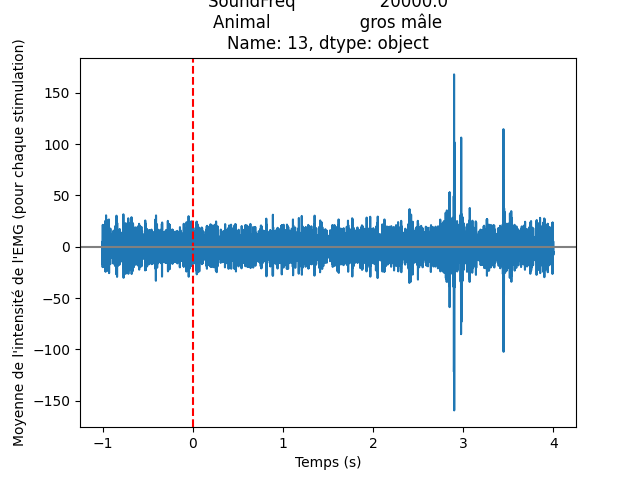

In [80]:
def plotERP(expeIndex):
    animal=conditions.iloc[expeIndex].Animal

    TSfile=listexpe.loc[expeIndex,'TTL']
    ttl=np.load(TSfile)

    ePhyfile=listexpe.loc[expeIndex,'path']
    EMG=np.memmap(ePhyfile, mode= 'r', dtype="int16").reshape(-1,64)[:,EMG_Ch[animal]]
    filt_EMG=filt_trace(EMG,"EMG",expeIndex)

    dataTS=np.load(listexpe.loc[expeIndex,'TSPath'])

    duration_before = 1  # Durée avant le stimulus en secondes
    duration_after = 4   # Durée après le stimulus en secondes
    duration_total = duration_before + duration_after  # Durée totale de la fenêtre 
    num_trials = int(ttl.shape[0] / 2)  # Nombre de stimuli
    fs=sampling_rate

    # Créer un vecteur de temps pour la période autour de chaque stimulus
    tt2 = np.arange(-duration_before, duration_after + 1/fs, 1/fs)  # +1/fs pour inclure la dernière valeur

    # Initialiser un tableau pour stocker les ERP
    erp = np.zeros((len(tt2),0), dtype=np.float64)

    # Boucler à travers chaque stimulus et calculer l'ERP
    for i in range(num_trials):
        timestamp = ttl[int(i * 2)]

        #use recording timestamps to align data with precision
        recIdx=find_nearest(dataTS,timestamp)
        start_idx = recIdx - int(duration_before * fs)
        end_idx = recIdx + int(duration_after * fs)

        # Vérifier que la taille du segment extrait correspond à len(tt2)
        segment = np.array(filt_EMG[start_idx:end_idx+1, np.newaxis])  # +1 pour inclure la dernière valeur
        if len(segment) == len(tt2):
            erp=np.append(erp,segment,axis=1)
        else:
            print(f"Échec pour le timestamp {timestamp} (longueur du segment = {len(segment)})")

    # Tracer l'ERP
    plt.close()
    titre = f"{conditions.iloc[expeIndex]}" # changer le titre ici
    plt.plot(tt2, np.mean(erp, axis = 1), color='#1f77b4')
    plt.axvline(x=0, color='r', linestyle='--')
    plt.title(titre)
    plt.axhline(y=0, color='grey', linestyle='-')
    plt.xlabel("Temps (s)")
    plt.ylabel("Moyenne de l'intensité de l'EMG (pour chaque stimulation)")
    #plt.ylim(-70, 70)  # Définir les limites de l'axe des y
    plt.show()


index=13
plotERP(index)


In [ ]:
%matplotlib qt

expeIndex=10
animal=conditions.iloc[expeIndex].Animal
print(animal)
ePhyfile=listexpe.loc[expeIndex,'path']
All=np.memmap(ePhyfile, mode= 'r', dtype="int16").reshape(-1,64)


win = MainViewer()
view1 = TraceViewer.from_numpy(All, sampling_rate, 0, 'Signals')
win.add_view(view1)

win.show()

gros mâle


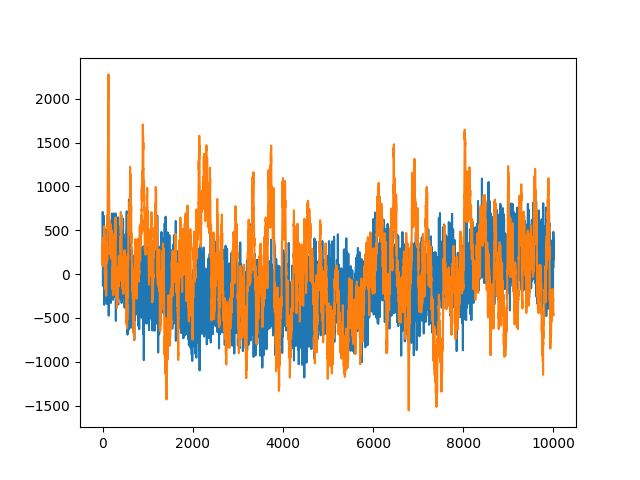

In [24]:
%matplotlib ipympl

plt.close()

#mâle 8, 10, 13
#femelle 9, 11, 12
expeIndex=13
animal=conditions.iloc[expeIndex].Animal
print(animal)
ePhyfile=listexpe.loc[expeIndex,'path']
EMG=np.memmap(ePhyfile, mode= 'r', dtype="int16").reshape(-1,64)[:,EMG_Ch[animal]]
HIP=np.memmap(ePhyfile, mode= 'r', dtype="int16").reshape(-1,64)[:,HIP_Ch[animal]]

plt.plot(EMG[:10000])
plt.plot(HIP[:10000])

plt.show()